In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Upload the CSV file
from google.colab import files
uploaded = files.upload()

Saving Healthcare Providers.csv to Healthcare Providers.csv


In [4]:
# Load the uploaded CSV file
df = pd.read_csv('Healthcare Providers.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst 5 Rows of the Dataset:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  obje

In [5]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                               

In [6]:
# Dropping columns with excessive missing values
df = df.drop(columns=['Street Address 2 of the Provider', 'Middle Initial of the Provider'])

# Fill missing values for categorical columns with 'Unknown'
df['Credentials of the Provider'] = df['Credentials of the Provider'].fillna('Unknown')
df['Gender of the Provider'] = df['Gender of the Provider'].fillna('Unknown')

# Convert necessary columns to numeric, handling errors where needed
numerical_columns = [
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
    'Zip Code of the Provider',
]
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nData cleaning completed.")


Data cleaning completed.


<ipython-input-7-cd5c7cae77e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender of the Provider', palette='viridis')


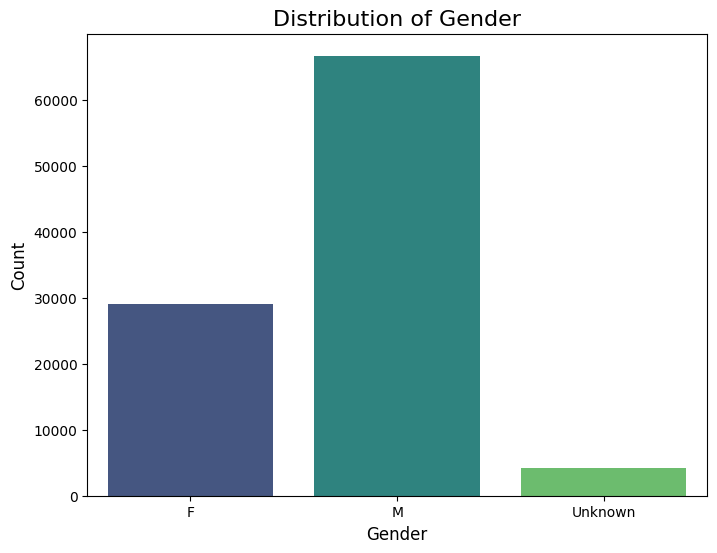

In [7]:
# Visualization 1: Distribution of Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender of the Provider', palette='viridis')
plt.title('Distribution of Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

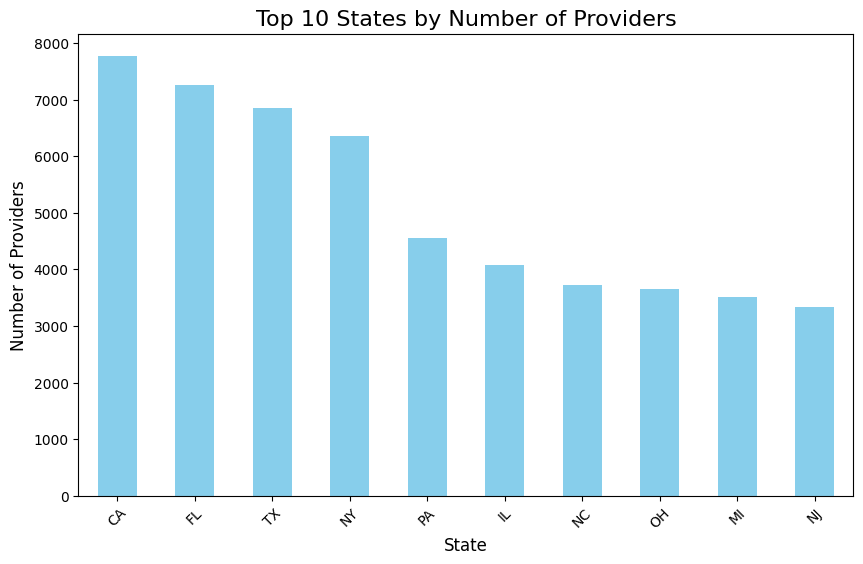

In [8]:
# Visualization 2: Top States by Number of Providers
plt.figure(figsize=(10, 6))
state_counts = df['State Code of the Provider'].value_counts().head(10)
state_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 States by Number of Providers', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Providers', fontsize=12)
plt.xticks(rotation=45)
plt.show()

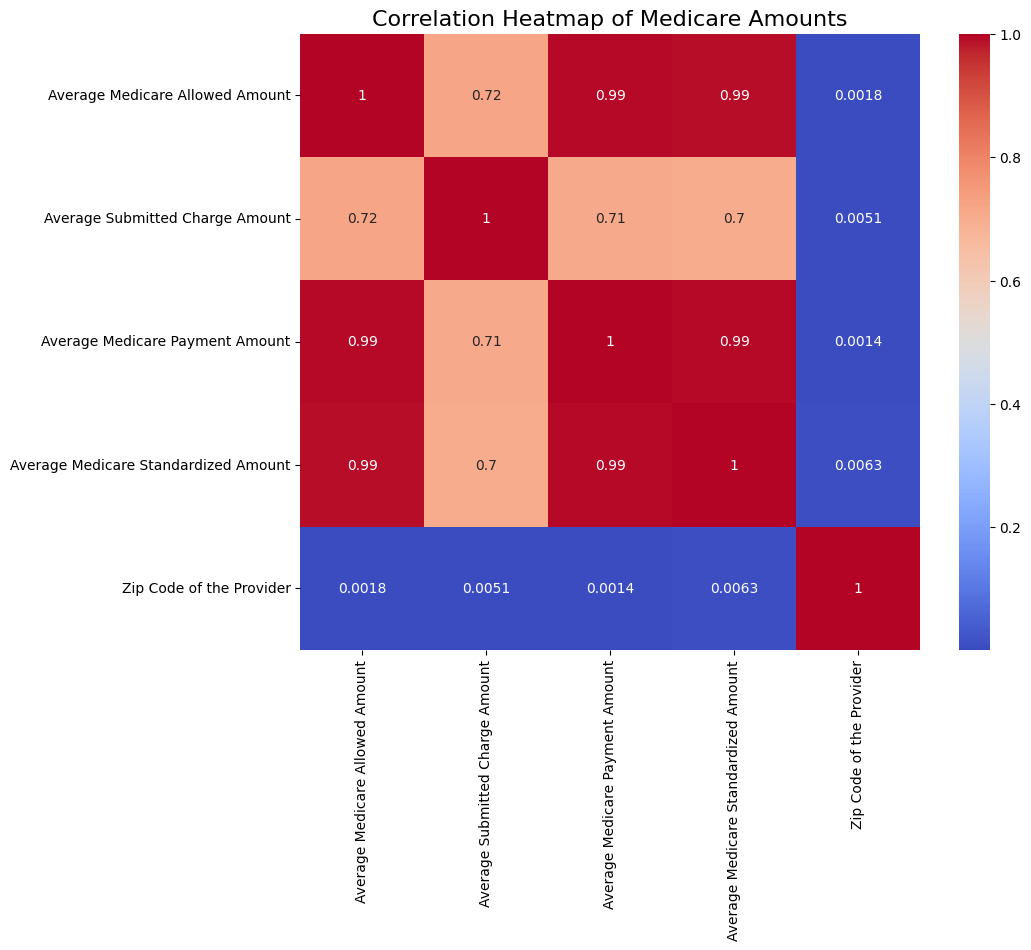

In [9]:
# Visualization 3: Correlation Heatmap
plt.figure(figsize=(10, 8))
numerical_columns_clean = [col for col in numerical_columns if df[col].notnull().sum() > 0]
sns.heatmap(df[numerical_columns_clean].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Medicare Amounts', fontsize=16)
plt.show()

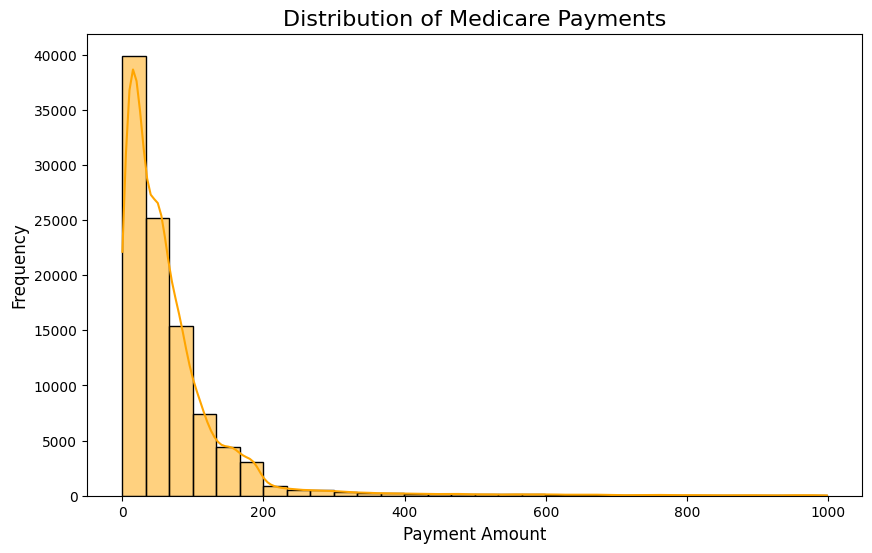

In [10]:
# Visualization 4: Distribution of Medicare Payments
plt.figure(figsize=(10, 6))
sns.histplot(df['Average Medicare Payment Amount'], bins=30, kde=True, color='orange')
plt.title('Distribution of Medicare Payments', fontsize=16)
plt.xlabel('Payment Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [11]:
# Summary Statistics for key numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(df[numerical_columns_clean].describe())


Summary Statistics for Numerical Columns:
       Average Medicare Allowed Amount  Average Submitted Charge Amount  \
count                     99255.000000                     93277.000000   
mean                         87.455376                       190.608753   
std                         103.400171                       191.077150   
min                           0.010000                         0.010000   
25%                          24.165714                        53.000000   
50%                          64.290000                       132.000000   
75%                         112.237335                       250.000000   
max                         999.848235                       999.736842   

       Average Medicare Payment Amount  Average Medicare Standardized Amount  \
count                     99534.000000                          99530.000000   
mean                         68.803728                             69.373304   
std                          91.177496   